In [21]:
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('train.csv')

In [23]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [24]:
#Data Cleaning

In [25]:
df.shape

(5574, 2)

In [26]:
df.isnull().sum()

sms      0
label    0
dtype: int64

In [27]:
df.rename(columns={'sms':'text','label':'target'},inplace=True)

In [28]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [29]:
df.duplicated().sum()

403

In [30]:
#Remove duplicate

In [31]:
df = df.drop_duplicates(keep='first')

In [32]:
df.duplicated().sum()

0

In [33]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [34]:
df.shape

(5171, 2)

In [35]:
#Data Analisys

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

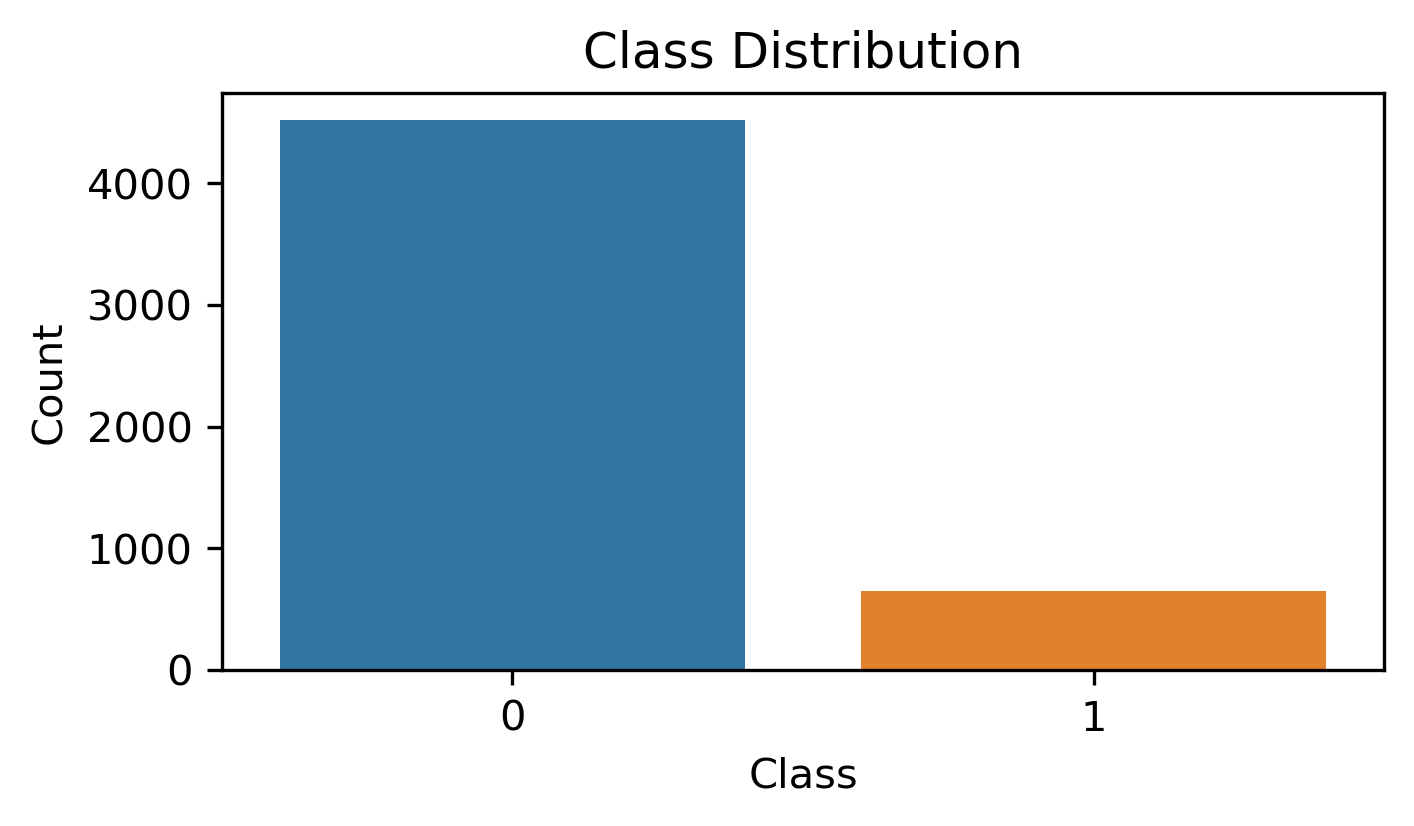

In [37]:
plt.figure(figsize=(5, 2.5), dpi=300)
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

In [38]:
import nltk
from nltk import word_tokenize

In [39]:
df['count_text_character'] = df['text'].apply(len)

In [40]:
df.head()

,text,target,count_text_character
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62


In [41]:
df['count_text_number'] = df['text'].apply(lambda x:len(x.split(' ')))

In [42]:
df.head()

,text,target,count_text_character,count_text_number
0,"Go until jurong point, crazy.. Available only ...",0,112,20
1,Ok lar... Joking wif u oni...\n,0,30,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,28
3,U dun say so early hor... U c already then say...,0,50,11
4,"Nah I don't think he goes to usf, he lives aro...",0,62,13


In [43]:
df.iloc[0].text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'

In [44]:
df.iloc[1].text

'Ok lar... Joking wif u oni...\n'

In [45]:
df['count_text_sentence'] = df['text'].apply(lambda x:len(x.split(',')))

In [46]:
df.head()

,text,target,count_text_character,count_text_number,count_text_sentence
0,"Go until jurong point, crazy.. Available only ...",0,112,20,2
1,Ok lar... Joking wif u oni...\n,0,30,6,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,28,1
3,U dun say so early hor... U c already then say...,0,50,11,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,13,2


In [47]:
df[['count_text_character','count_text_number','count_text_sentence']].describe()

,count_text_character,count_text_number,count_text_sentence
count,5171.000000,5171.000000,5171.000000
mean,80.332431,15.549217,1.334751
std,58.333188,11.196886,0.782243
min,3.000000,1.000000,1.000000
25%,37.000000,7.000000,1.000000
50%,62.000000,12.000000,1.000000
75%,120.000000,22.000000,1.000000
max,911.000000,171.000000,14.000000


In [48]:
df[df['target'] == 0][['count_text_character','count_text_number','count_text_sentence']].describe()

,count_text_character,count_text_number,count_text_sentence
count,4518.000000,4518.000000,4518.000000
mean,71.894865,14.358566,1.308986
std,56.590179,11.276420,0.750567
min,3.000000,1.000000,1.000000
25%,35.000000,7.000000,1.000000
50%,54.000000,11.000000,1.000000
75%,92.000000,19.000000,1.000000
max,911.000000,171.000000,14.000000


In [49]:
df[df['target'] == 1][['count_text_character','count_text_number','count_text_sentence']].describe()

,count_text_character,count_text_number,count_text_sentence
count,653.000000,653.000000,653.000000
mean,138.710567,23.787136,1.513017
std,29.818940,5.948838,0.955401
min,14.000000,2.000000,1.000000
25%,133.000000,22.000000,1.000000
50%,149.000000,25.000000,1.000000
75%,158.000000,28.000000,2.000000
max,224.000000,35.000000,7.000000


In [50]:
import seaborn as sns

<Axes: xlabel='count_text_character', ylabel='Count'>

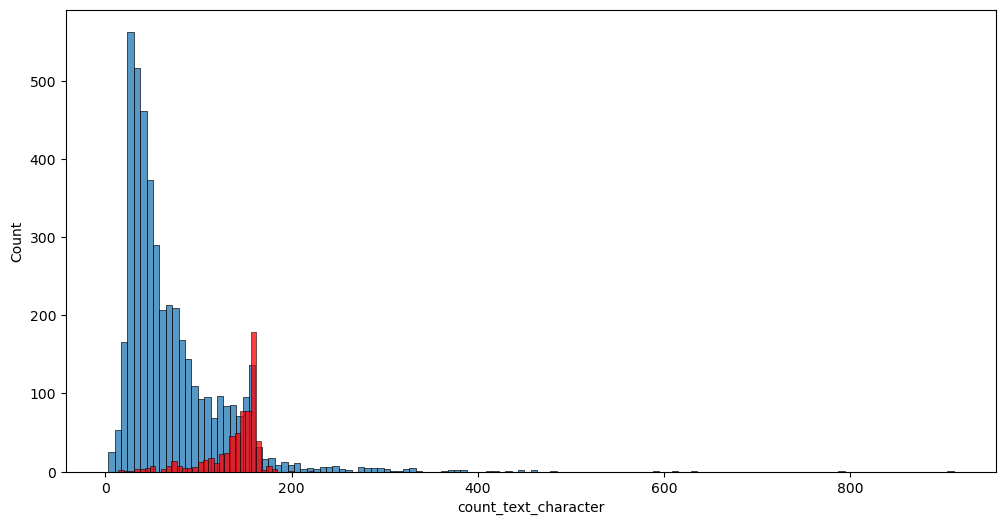

In [51]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['count_text_character'])
sns.histplot(df[df['target'] == 1]['count_text_character'],color='red')

<Axes: xlabel='count_text_number', ylabel='Count'>

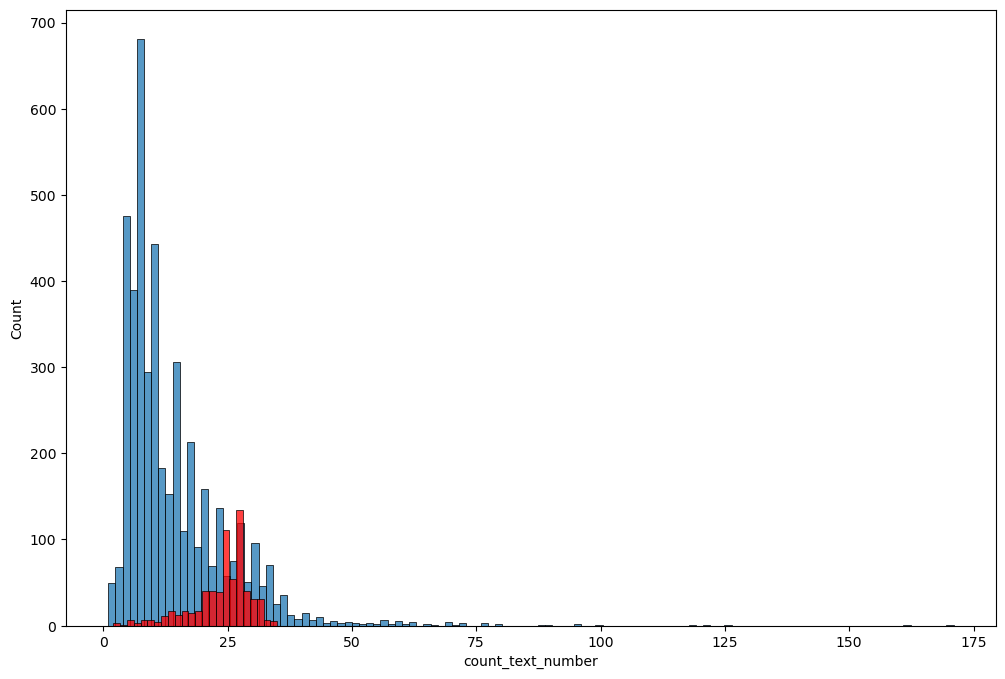

In [52]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['count_text_number'])
sns.histplot(df[df['target'] == 1]['count_text_number'],color='red')

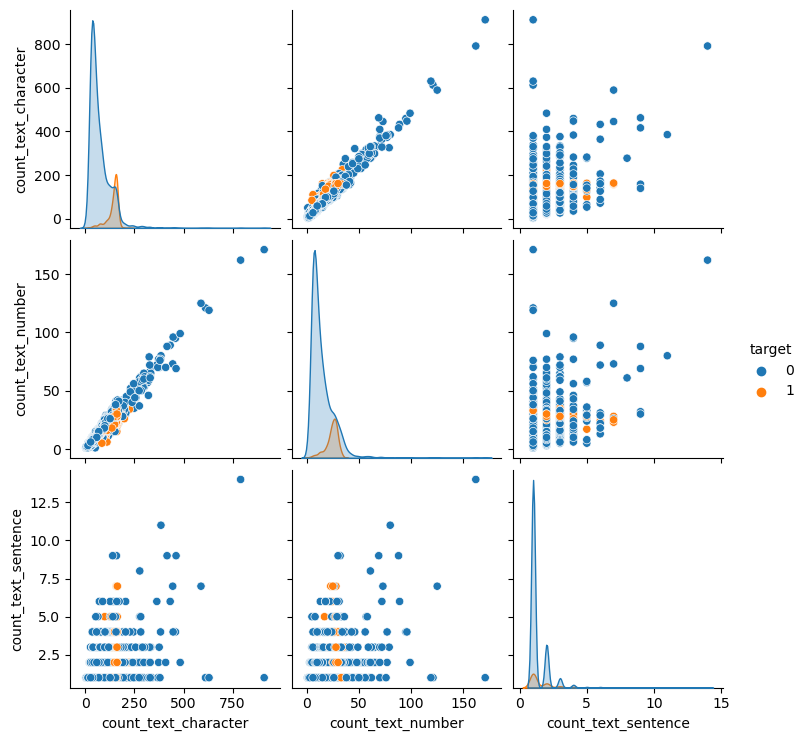

In [53]:
sns.pairplot(df,hue='target')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25588\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

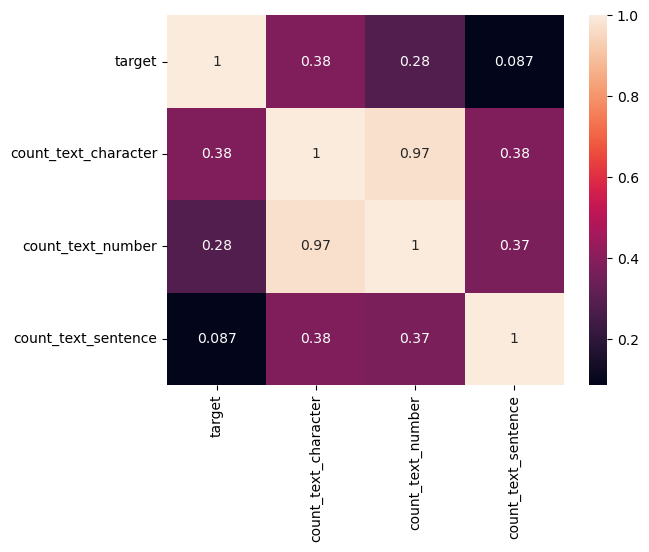

In [54]:
sns.heatmap(df.corr(),annot=True)

In [55]:
#Data Preprocessing

In [56]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
import re
def tranceform_text(text):
    text = text.lower()
    text = re.split(r'[^\w]+',text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in STOPWORDS and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [64]:
tranceform_text('I Loved this Machine Learning Project')

'love machin learn project'

In [59]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
print(STOPWORDS)

frozenset({'almost', 'nothing', 'km', 'seem', 'once', 'without', 'a', 'an', 'noone', 'with', 'five', 'anyhow', 'still', 'seeming', 'somehow', 'whereafter', 'further', 'up', 'otherwise', 'be', 'will', 'becomes', 'more', 'everything', 'too', 'eight', 'whoever', 'something', 'after', 'another', 'have', 'i', 'much', 'amoungst', 'during', 'besides', 'call', 'top', 'whereby', 'thus', 'do', 'there', 'doing', 'among', 'which', 'those', 'below', 'around', 'due', 'find', 'or', 'anyway', 'few', 'their', 'even', 'then', 'same', 'back', 'did', 'last', 'fifty', 'upon', 'side', 'latterly', 'thence', 'ie', 'least', 'nobody', 'first', 'see', 'here', 'twelve', 'bottom', 'nine', 'where', 'moreover', 'every', 'anything', 'thereby', 'them', 'whence', 'until', 'go', 'what', 'keep', 'ltd', 'hundred', 'except', 'meanwhile', 'found', 'neither', 'himself', 'everyone', 'within', 'above', 'thru', 'computer', 'its', 'ever', 'should', 'beyond', 'doesn', 'had', 'the', 'regarding', 'three', 'must', 'anyone', 'themsel

In [61]:
text = "hello my name is deep khokhar and i am currantly persuing bechlors of engineering in depstar charusat"
new_text = remove_stopwords(text)
print(new_text)
print("Old length: ", len(text))
print("New length: ", len(new_text))

hello deep khokhar currantly persuing bechlors engineering depstar charusat
Old length:  101
New length:  75


In [63]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [65]:
df.head()

,text,target,count_text_character,count_text_number,count_text_sentence
0,"Go until jurong point, crazy.. Available only ...",0,112,20,2
1,Ok lar... Joking wif u oni...\n,0,30,6,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,28,1
3,U dun say so early hor... U c already then say...,0,50,11,1
4,"Nah I don't think he goes to usf, he lives aro...",0,62,13,2


In [66]:
df['tranceform_text'] = df['text'].apply(tranceform_text)

In [67]:
df.head()

,text,target,count_text_character,count_text_number,count_text_sentence,tranceform_text
0,"Go until jurong point, crazy.. Available only ...",0,112,20,2,jurong point crazi avail bugi n great world la...
1,Ok lar... Joking wif u oni...\n,0,30,6,1,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,50,11,1,u dun earli hor u c
4,"Nah I don't think he goes to usf, he lives aro...",0,62,13,2,nah t think goe usf live


In [68]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [69]:
spam_wc = wc.generate(df[df['target']==1]['tranceform_text'].str.cat(sep=" "))

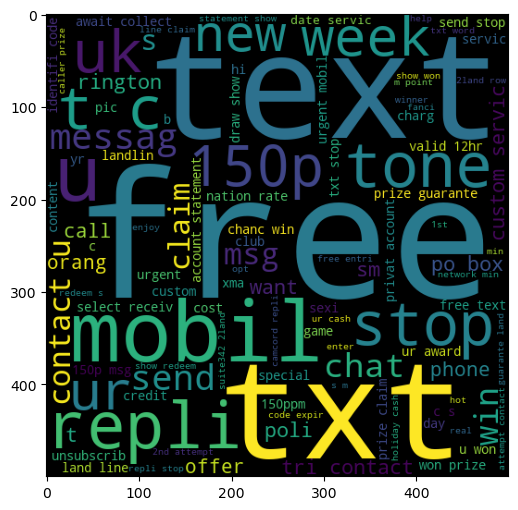

In [70]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [71]:
ham_wc = wc.generate(df[df['target']==0]['tranceform_text'].str.cat(sep=" "))

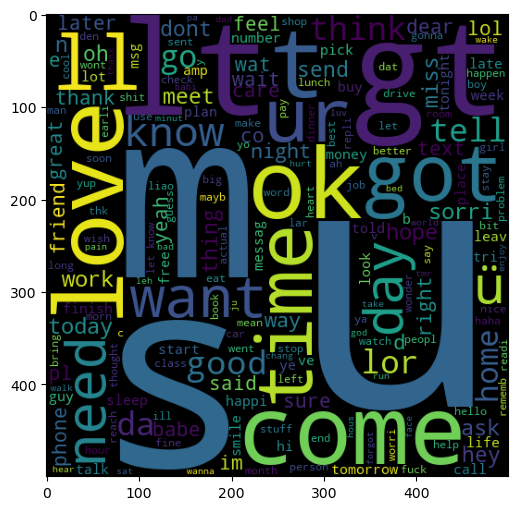

In [72]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [73]:
spam_corpus = []

for msg in df[df['target']==1]['tranceform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [74]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 's',
 'appli',
 '08452810075over18',
 's',
 'freemsg',
 'hey',
 'darl',
 's',
 '3',
 'week',
 's',
 'word',
 'd',
 'like',
 'fun',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 '1',
 '50',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 '900',
 'prize',
 'reward',
 'claim',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'mobil',
 'updat',
 'free',
 '08002986030',
 'chanc',
 'win',
 'cash',
 '100',
 '20',
 '000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150p',
 'day',
 '6day',
 '16',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 'won',
 '1',
 'week',
 'free',
 'membership',
 '100',
 '000',
 

In [75]:
from collections import Counter
spam_count = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [76]:
spam_count[0]


0        free
1           2
2           u
3         txt
4        text
5          ur
6       mobil
7           4
8        stop
9       repli
10      claim
11          1
12      prize
13        www
14          t
15          s
16        min
17       tone
18       cash
19     servic
20       150p
21        new
22         uk
23       send
24        won
25      nokia
26     urgent
27        msg
28    contact
29       week
Name: 0, dtype: object

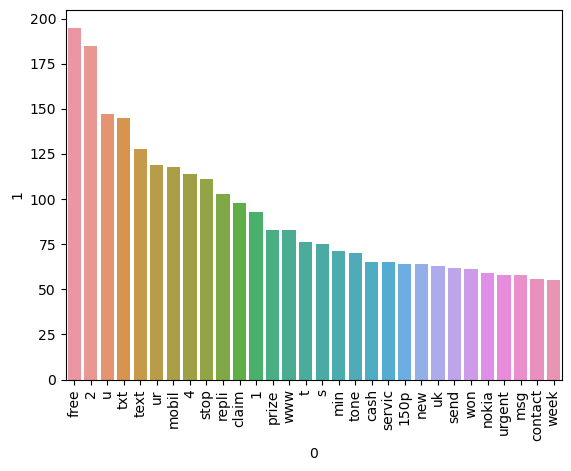

In [77]:
sns.barplot(x=spam_count[0],y=spam_count[1])
plt.xticks(rotation='vertical')
plt.show()

In [78]:
ham_corpus = []

for msg in df[df['target']==0]['tranceform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [79]:
len(ham_corpus)

34168

In [80]:
from collections import Counter
ham_count = pd.DataFrame(Counter(ham_corpus).most_common(30))

In [81]:
ham_count.head()

,0,1
0,u,930
1,s,479
2,m,395
3,t,384
4,2,306


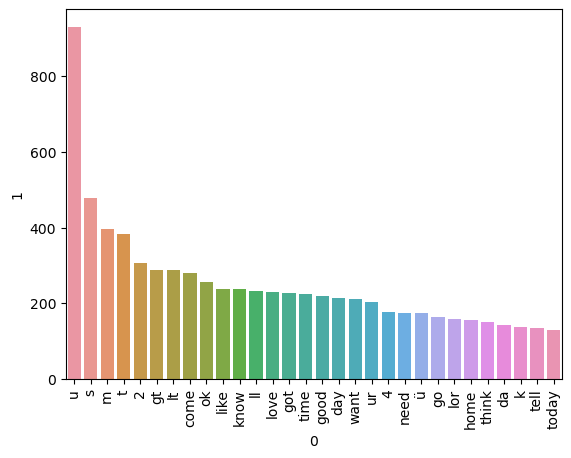

In [97]:
sns.barplot(x=ham_count[0],y=ham_count[1])
plt.xticks(rotation='vertical')
plt.show()

#Model building

In [112]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [113]:
X = tfidf.fit_transform(df['tranceform_text']).toarray()

In [114]:
X.shape

(5171, 3000)

In [115]:
y = df['target'].values

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [118]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [119]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8705314009661835
[[779 108]
 [ 26 122]]
0.5304347826086957


In [135]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9671497584541063
[[887   0]
 [ 34 114]]
1.0


In [121]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9758454106280193
[[885   2]
 [ 23 125]]
0.984251968503937


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [123]:
names_of_models=[
    "LogisticRegression",
    "RandomForestClassifier",
    "GaussianNB",
    "BernoulliNB",
    "MultinomialNB",
    "SVC",
    "DecisionTreeClassifier",
    "KNeighborsClassifier"
]

models={
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=50,random_state=2),
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "MultinomialNB": MultinomialNB(),
    "SVC": SVC(kernel='sigmoid',gamma=1),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=5),
    "KNeighborsClassifier": KNeighborsClassifier()
}


In [124]:
accuracies.clear()

In [125]:
accuracies=[]
cm=[]
ps=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    AS=accuracy_score(y_test, y_pred)
    CM = confusion_matrix(y_test,y_pred)
    PS=precision_score(y_test, y_pred)
    accuracies.append(AS)
    cm.append(CM)
    ps.append(PS)

    print(f'Results for {name}:')
    print()
    print('Accuracy score: ', AS)
    print("Confusion Matrix: ")
    print(CM)
    print('precision_score: ', PS)
    print()
    print()

Results for LogisticRegression:

Accuracy score:  0.9478260869565217
Confusion Matrix: 
[[886   1]
 [ 53  95]]
precision_score:  0.9895833333333334


Results for RandomForestClassifier:

Accuracy score:  0.9710144927536232
Confusion Matrix: 
[[887   0]
 [ 30 118]]
precision_score:  1.0


Results for GaussianNB:

Accuracy score:  0.8705314009661835
Confusion Matrix: 
[[779 108]
 [ 26 122]]
precision_score:  0.5304347826086957


Results for BernoulliNB:

Accuracy score:  0.9758454106280193
Confusion Matrix: 
[[885   2]
 [ 23 125]]
precision_score:  0.984251968503937


Results for MultinomialNB:

Accuracy score:  0.9671497584541063
Confusion Matrix: 
[[887   0]
 [ 34 114]]
precision_score:  1.0


Results for SVC:

Accuracy score:  0.9671497584541063
Confusion Matrix: 
[[886   1]
 [ 33 115]]
precision_score:  0.9913793103448276


Results for DecisionTreeClassifier:

Accuracy score:  0.9294685990338164
Confusion Matrix: 
[[886   1]
 [ 72  76]]
precision_score:  0.987012987012987


Results f

In [126]:
 pd.DataFrame({"Names": names_of_models, "Accuracies": accuracies})

,Names,Accuracies
0,LogisticRegression,0.947826
1,RandomForestClassifier,0.971014
2,GaussianNB,0.870531
3,BernoulliNB,0.975845
4,MultinomialNB,0.967150
5,SVC,0.967150
6,DecisionTreeClassifier,0.929469
7,KNeighborsClassifier,0.903382


In [127]:
names_of_models

['LogisticRegression',
 'RandomForestClassifier',
 'GaussianNB',
 'BernoulliNB',
 'MultinomialNB',
 'SVC',
 'DecisionTreeClassifier',
 'KNeighborsClassifier']

In [128]:
accuracies

[0.9478260869565217,
 0.9710144927536232,
 0.8705314009661835,
 0.9758454106280193,
 0.9671497584541063,
 0.9671497584541063,
 0.9294685990338164,
 0.9033816425120773]

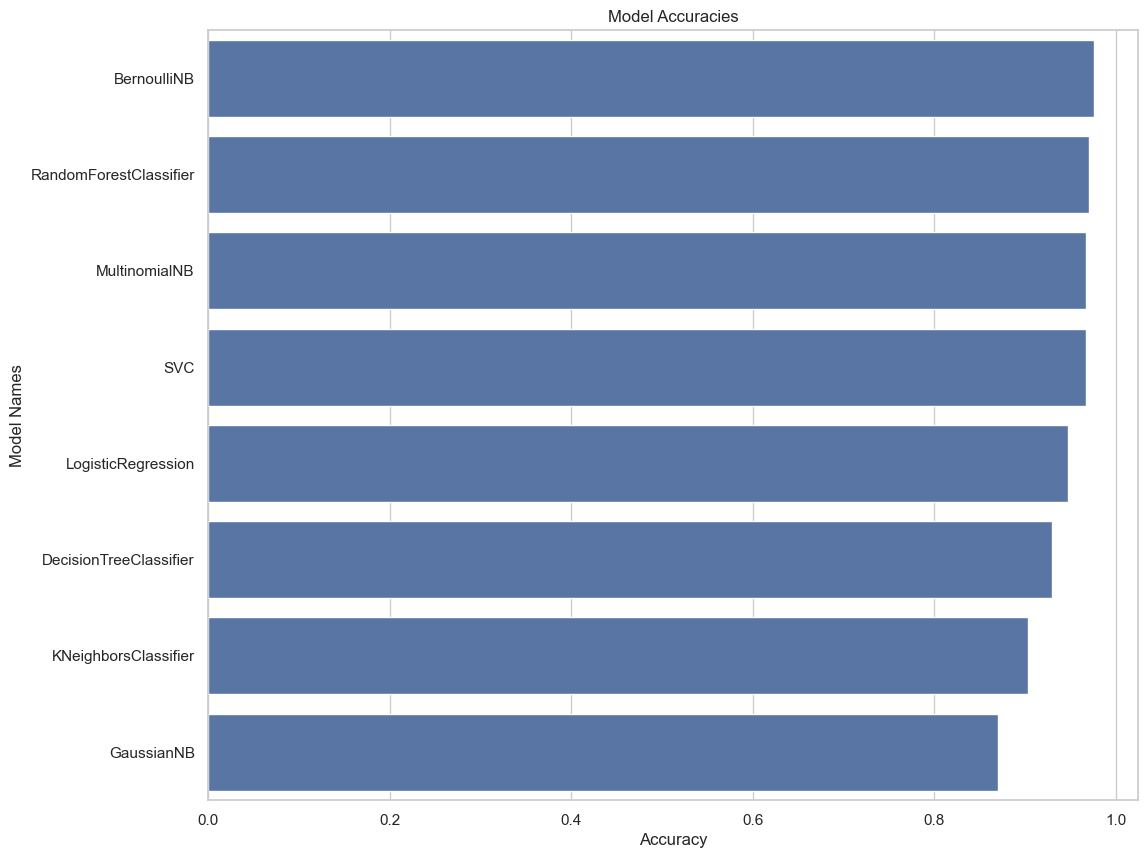

In [129]:
data = pd.DataFrame({"Names": names_of_models, "Accuracies": accuracies}).sort_values(by=['Accuracies'], ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

sns.barplot(x="Accuracies", y="Names", data=data, color="b")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

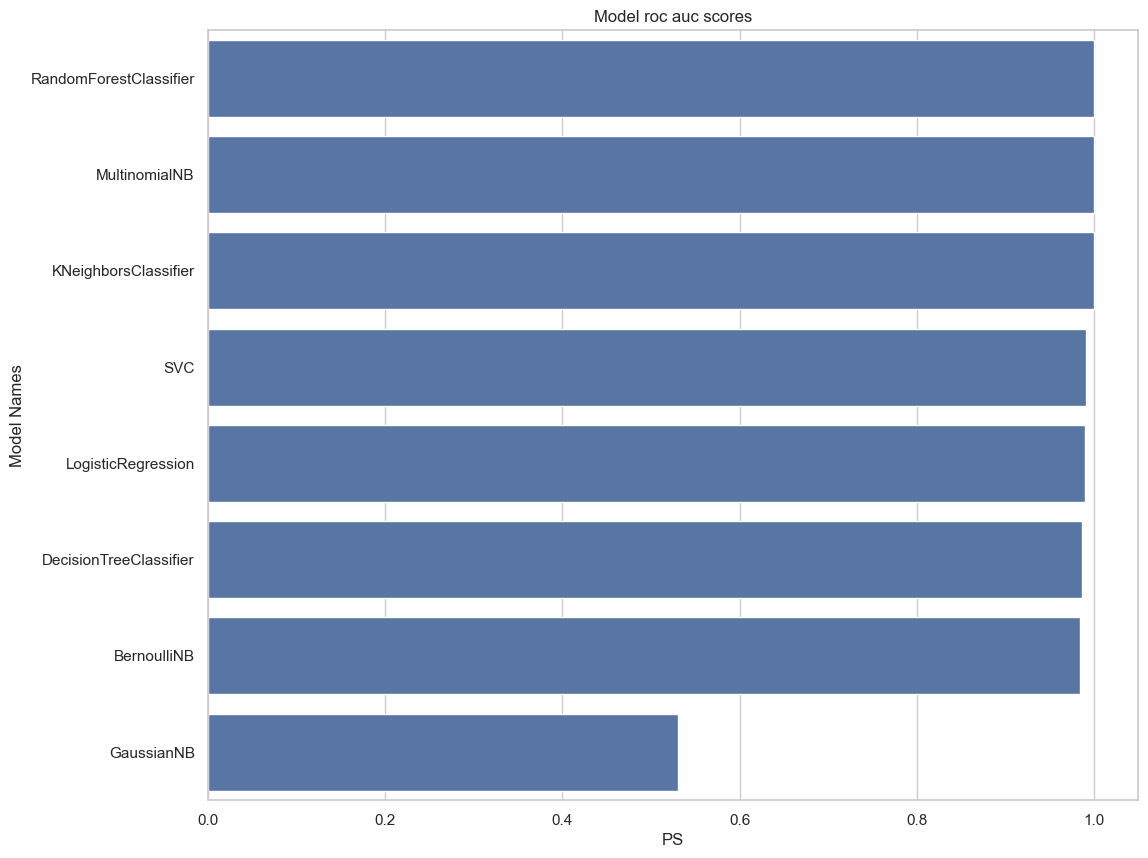

In [130]:
data2 = pd.DataFrame({"Names": names_of_models, "ps": ps}).sort_values(by=['ps'], ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

sns.barplot(x="ps", y="Names", data=data2, color="b")

plt.xlabel("PS")
plt.ylabel("Model Names")
plt.title("Model roc auc scores")

plt.show()

<Axes: >

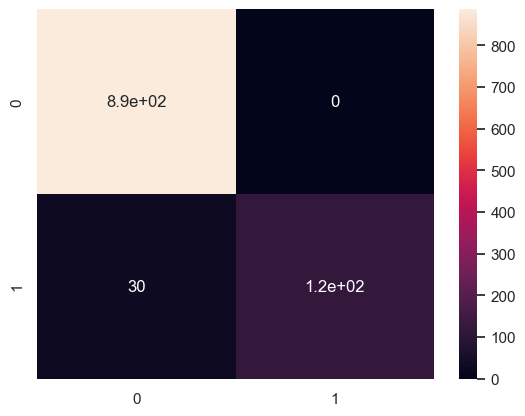

In [133]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
Y_pred=model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True)

In [134]:
import pickle
pickle.dump(tfidf,open('vectorize.pkl','wb'))
pickle.dump(mnb,open('mnb.pkl','wb'))

In [136]:
pickle.dump(mnb,open('mnb.pkl','wb'))